In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_wo_lag.csv',header = 0)
features = ['Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_current'])
y = df["Chl_current"]

In [4]:
x.head()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [5]:
features = list(x.columns)
features

['Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [6]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [7]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [10]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for criterion in ['squared_error','absolute_error']:
        for max_depth in [10,50,100]:
            for min_samples_split in [2,4,8,16]:
                for min_samples_leaf in [1,2,4,8]:
                    for max_features in [0.6,0.8,1.0]:
                        for bootstrap in [True]:
                            for max_samples in [0.8,0.9,1.0]:
                                for ccp_alpha in [0,1,10,100,1000]:


                                    ETR = ExtraTreesRegressor(n_estimators = n_estimators, criterion = criterion,max_depth = max_depth, 
                                                                min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,
                                                               max_features = max_features,bootstrap = bootstrap, max_samples = max_samples,
                                                             ccp_alpha = ccp_alpha, n_jobs=-1)

                                    ETR.fit(Xtrain,Ytrain)
                                    score = ETR.score(Xtest,Ytest)
                                    if score > best_score:
                                        best_score = score
                                        best_parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
                                                          'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                                           'max_features':max_features,'bootstrap':bootstrap,'max_samples':max_samples,
                                                          'ccp_alpha':ccp_alpha}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.418
Best parameters:{'n_estimators': 100, 'criterion': 'absolute_error', 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.8, 'bootstrap': True, 'max_samples': 0.9, 'ccp_alpha': 0}


In [11]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for criterion in ['squared_error','absolute_error']:
        for max_depth in [10,50,100]:
            for min_samples_split in [2,4,8,16]:
                for min_samples_leaf in [1,2,4,8]:
                    for max_features in [0.6,0.8,1.0]:
                        for bootstrap in [True,False]:
                            for ccp_alpha in [0,1,10,100,1000]:


                                ETR = ExtraTreesRegressor(n_estimators = n_estimators, criterion = criterion,max_depth = max_depth, 
                                                            min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,
                                                           max_features = max_features,bootstrap = bootstrap,ccp_alpha = ccp_alpha,
                                                         n_jobs=-1)

                                ETR.fit(Xtrain,Ytrain)
                                score = ETR.score(Xtest,Ytest)
                                if score > best_score:
                                    best_score = score
                                    best_parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
                                                      'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                                       'max_features':max_features,'bootstrap':bootstrap,'ccp_alpha':ccp_alpha}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.419
Best parameters:{'n_estimators': 200, 'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0, 'bootstrap': True, 'ccp_alpha': 0}


In [29]:
# ETR

# 1.Model
ETR = ExtraTreesRegressor(n_estimators=200, criterion='absolute_error', max_depth=10, min_samples_split=2, min_samples_leaf=2, 
                          max_features=1.0,bootstrap=True)

# 2.Train
ETR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = ETR.predict(Xtrain)
y_predict_xtest = ETR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.7473493766548949
R2 for test: 0.4115692823535618
MAE for train: 0.44527655313690057
MAE for test: 0.7645337288327745
MSE for train: 0.7544597161111118
MSE for test: 1.6601271440307799
MAPE for train 0.4955248875281407
MAPE for test 0.6474294271547191


In [30]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

49.55248875281407

In [32]:
importance = ETR.feature_importances_
print(importance)
print([*zip(features,ETR.feature_importances_)])

[0.03589324 0.10210588 0.05015818 0.08027039 0.04481156 0.10497464
 0.12570963 0.02591757 0.03082949 0.02831389 0.02661162 0.0285218
 0.3158821 ]
[('Ammonia Nitrogen', 0.03589324153855592), ('NOx', 0.10210587624784881), ('Dissolved Oxygen', 0.05015818090747141), ('pH', 0.08027038791285168), ('Water Temperature', 0.044811563897252334), ('Turbidity', 0.10497463850478599), ('Total Phosphorus', 0.12570963462649423), ('Air Temperature', 0.025917569458888297), ('Specific Humidity', 0.03082948553437442), ('Wind Speed', 0.028313893518179922), ('Precipitation', 0.02661162317675298), ('Shortwave Radiation Flux', 0.028521803926780862), ('Developed Percent', 0.31588210074976325)]


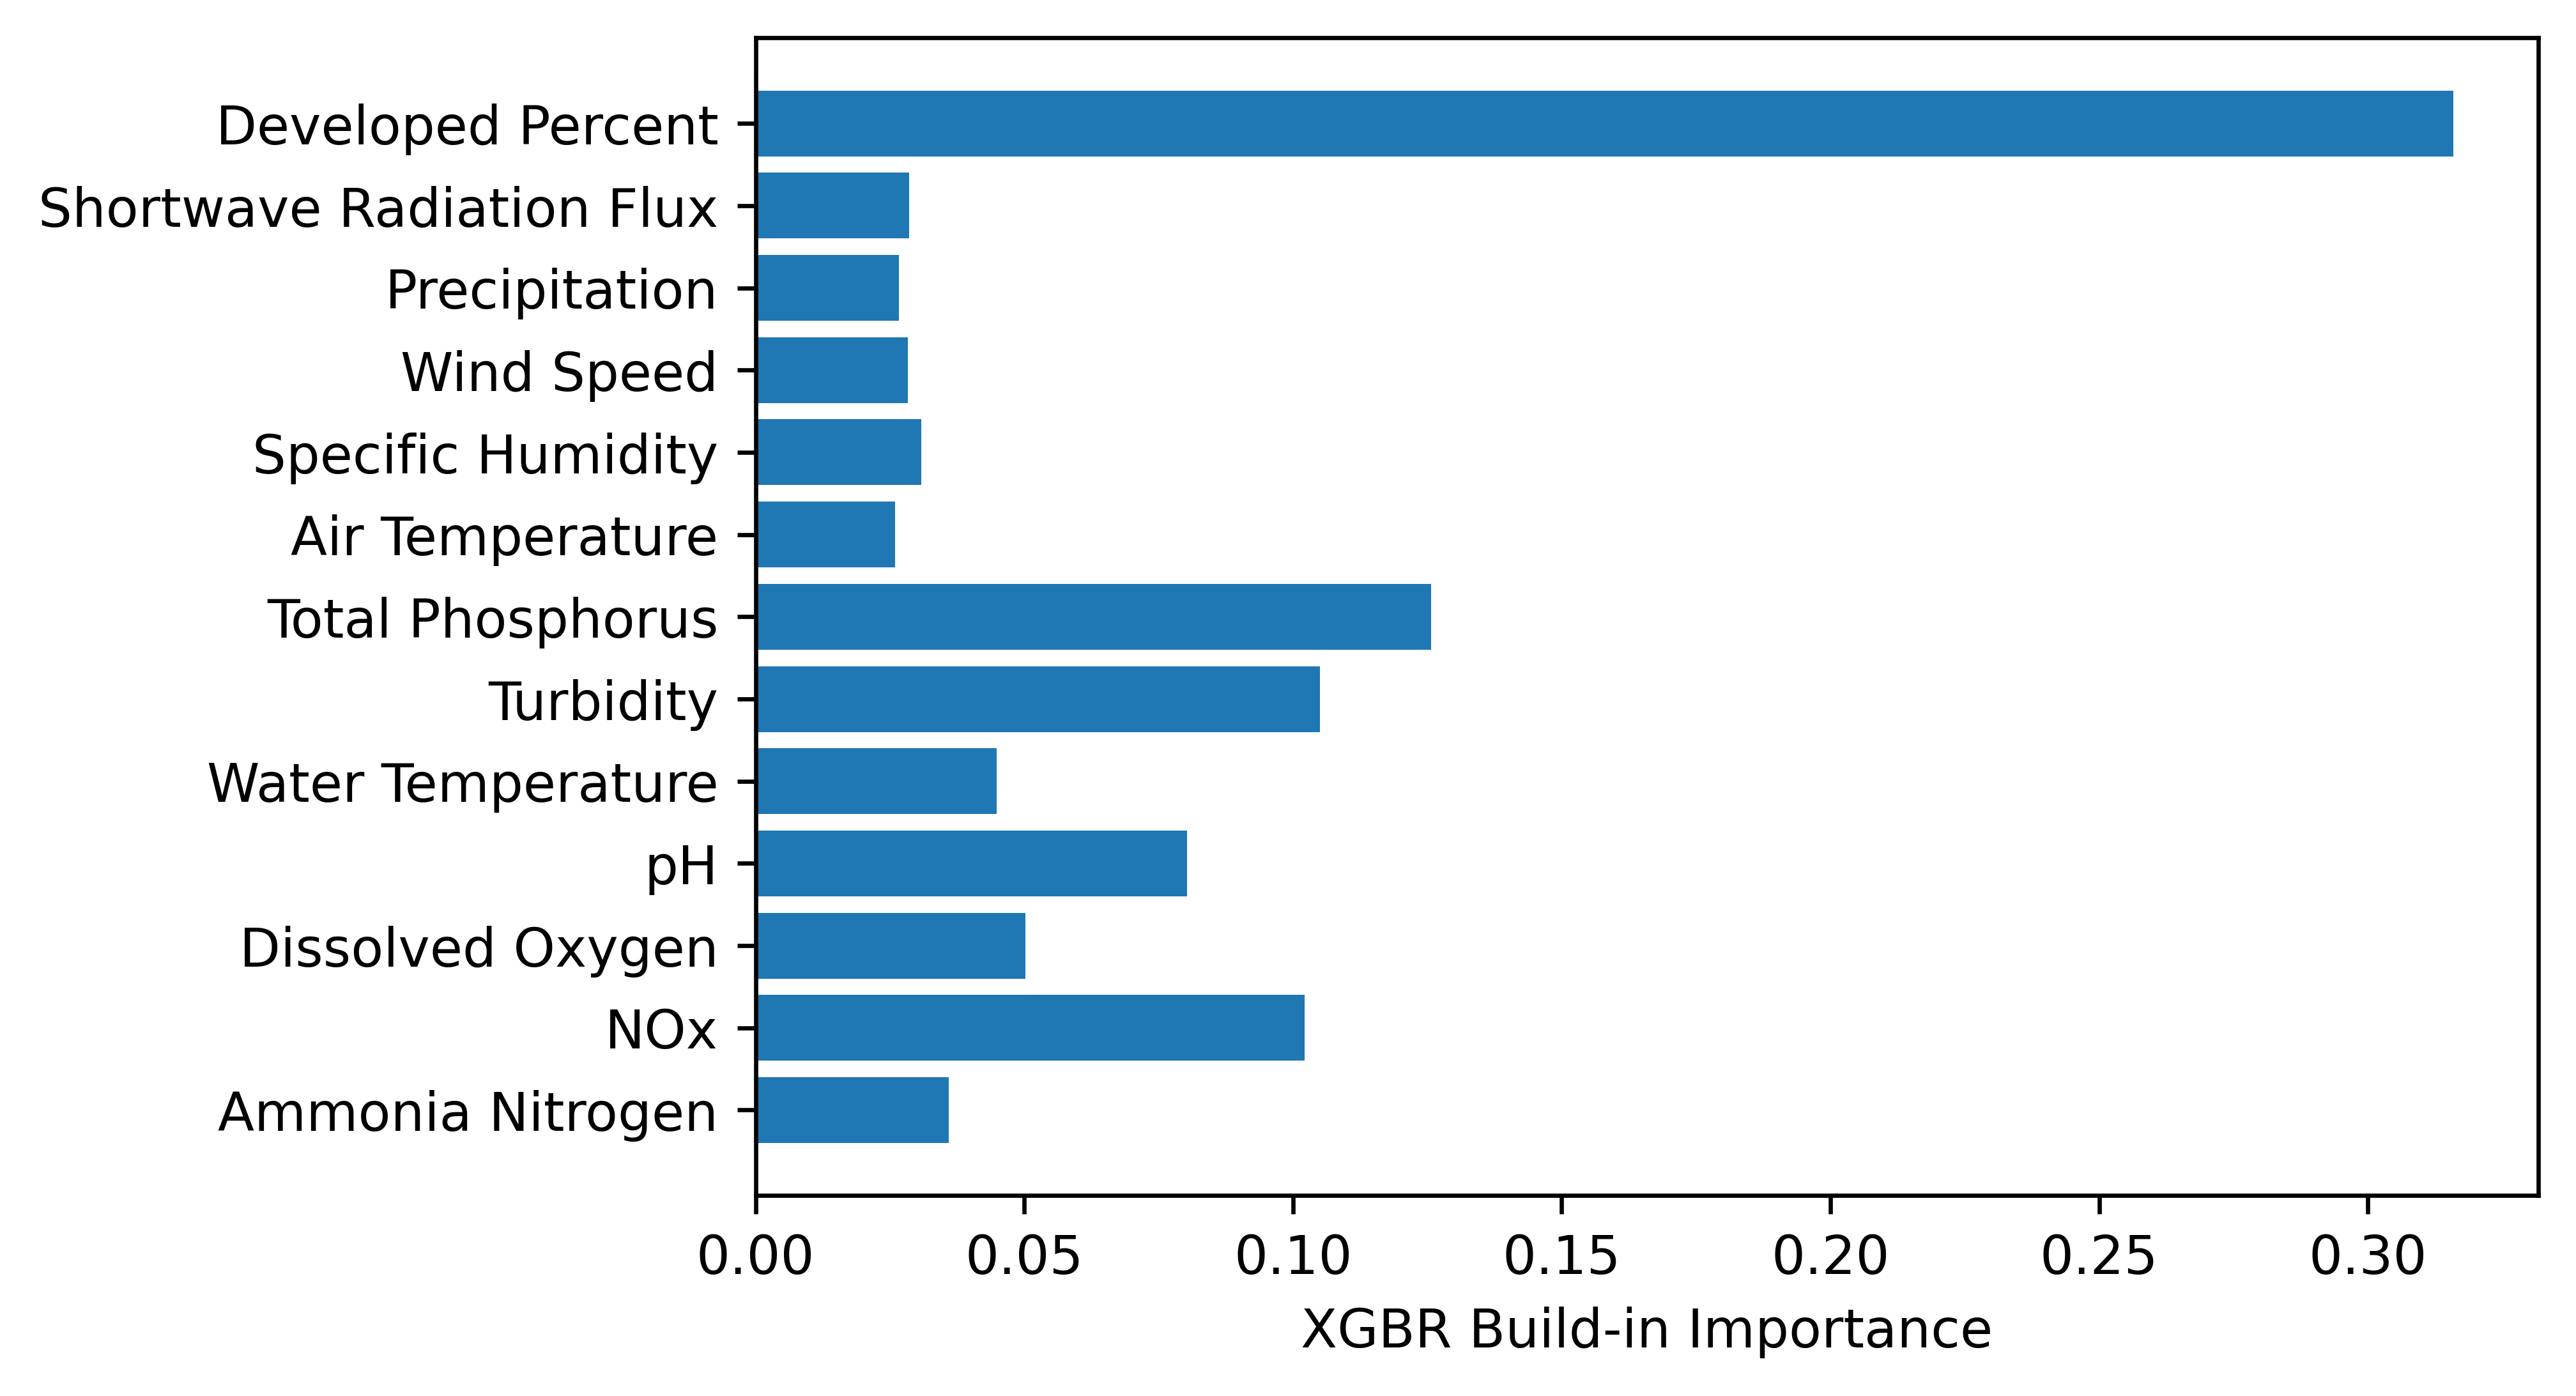

In [33]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = ETR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('XGBR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

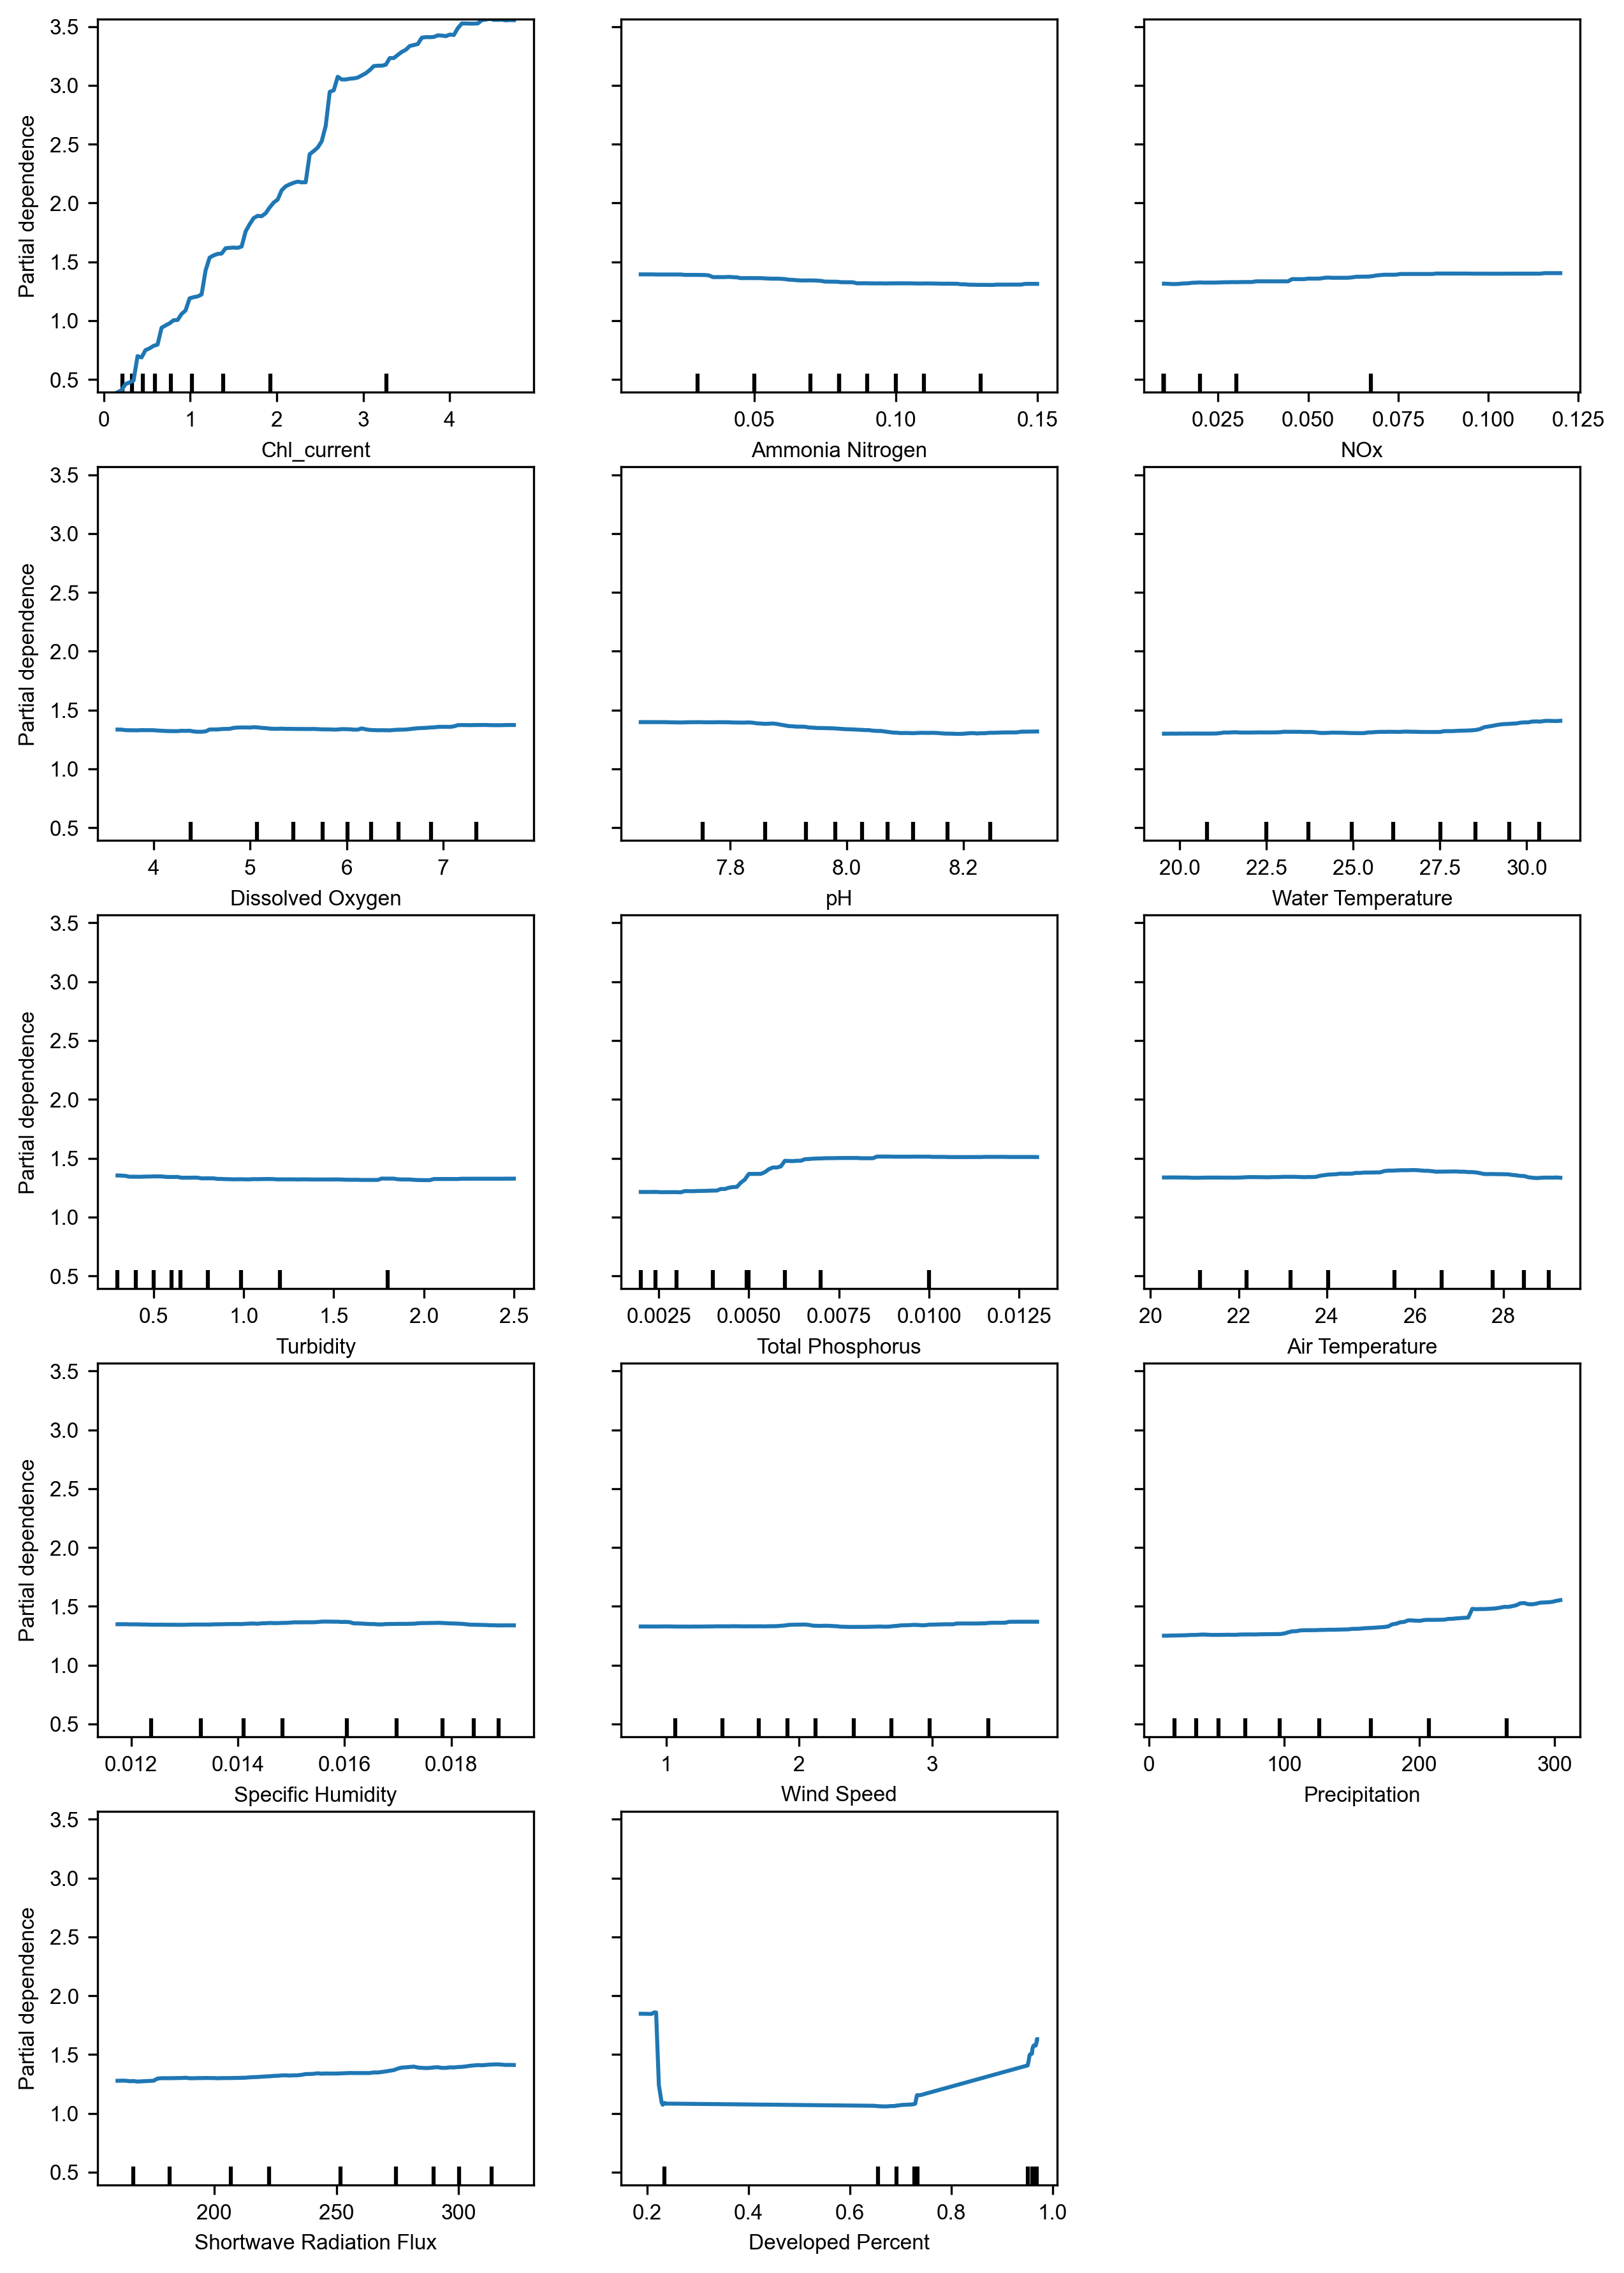

In [265]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(RFR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13])

[ 2.76866831e-02  1.19956963e-01  1.97500397e-02  7.04136978e-03
  3.05792690e-02  4.25583584e-02  8.02111011e-02 -5.64295438e-04
 -2.01757803e-04 -2.02959147e-03  4.07846301e-03 -6.62828382e-04
  3.90390499e-01]


Text(0.5, 0, 'ETR Permutation Importance')

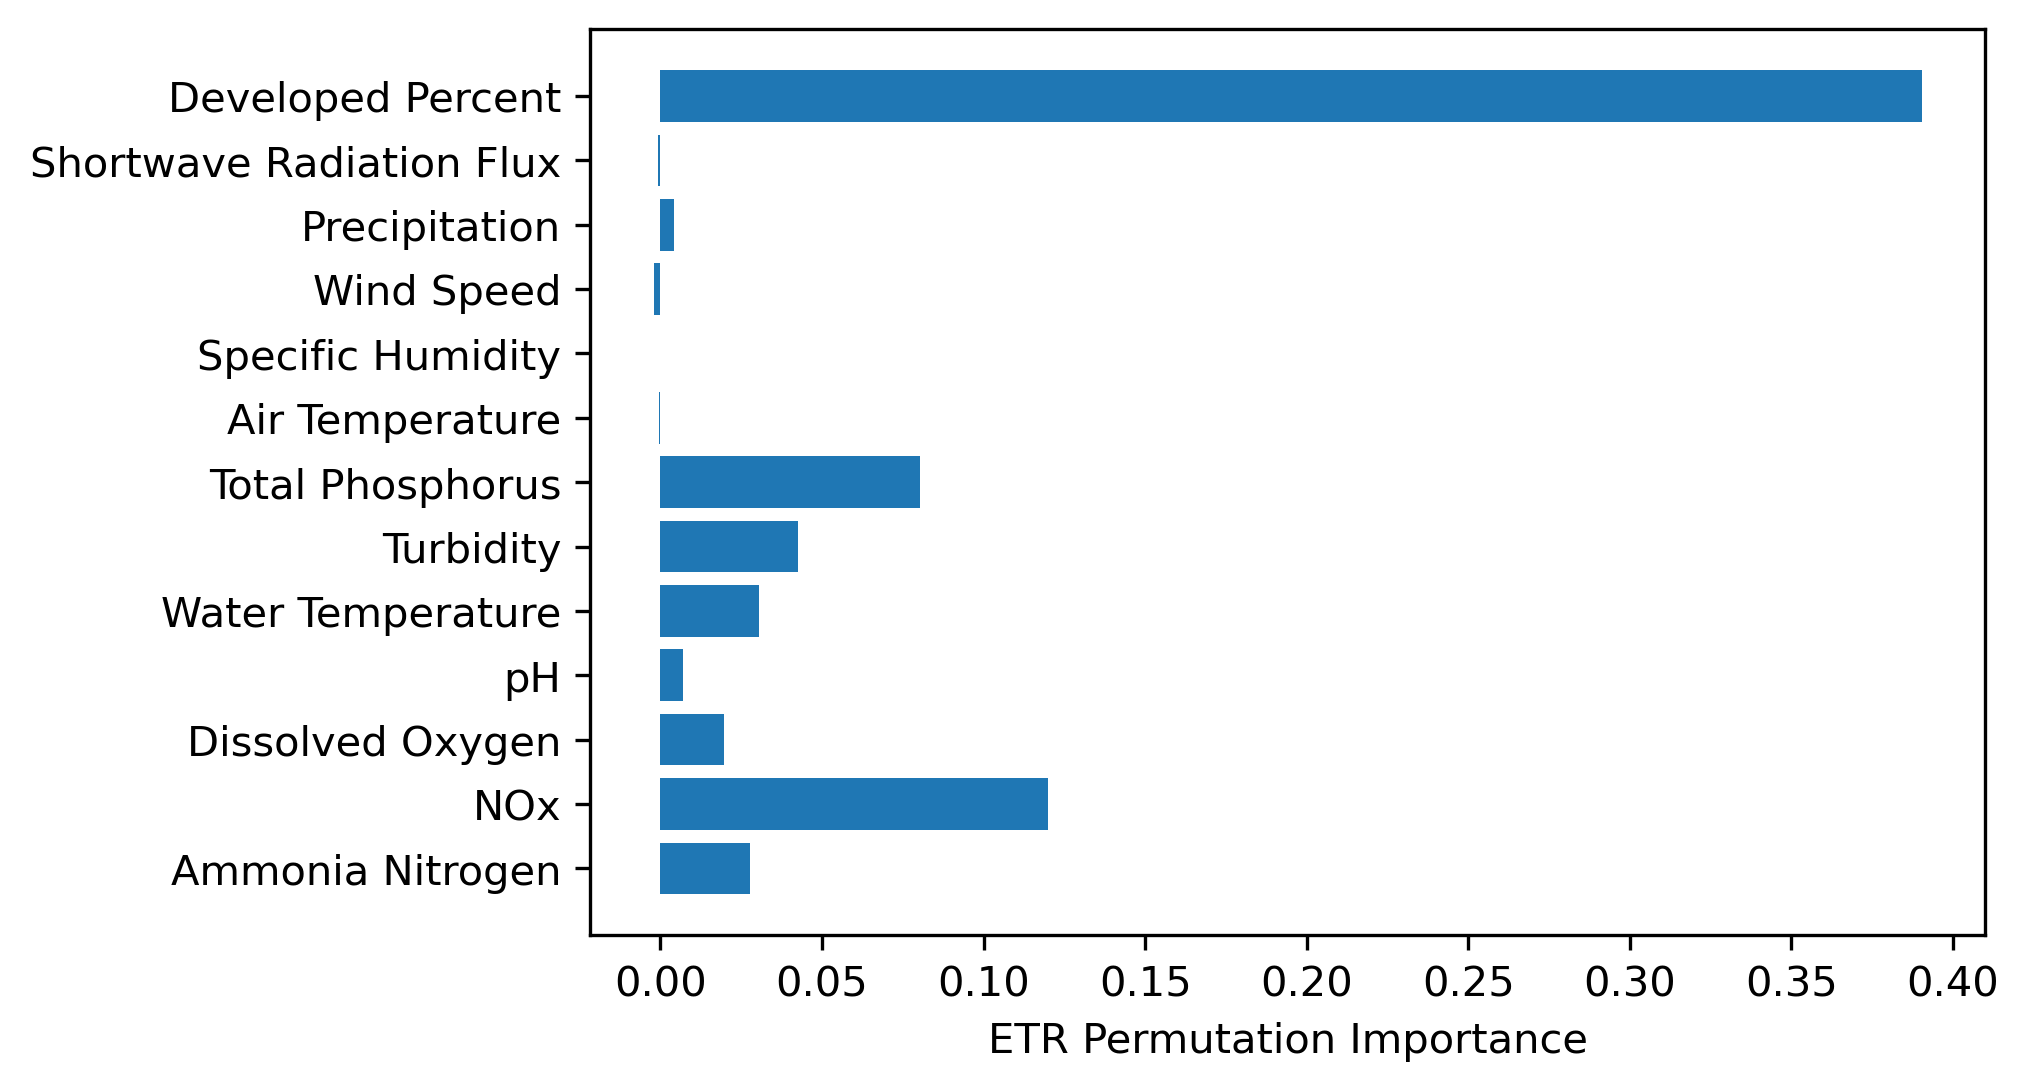

In [34]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(ETR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("ETR Permutation Importance")

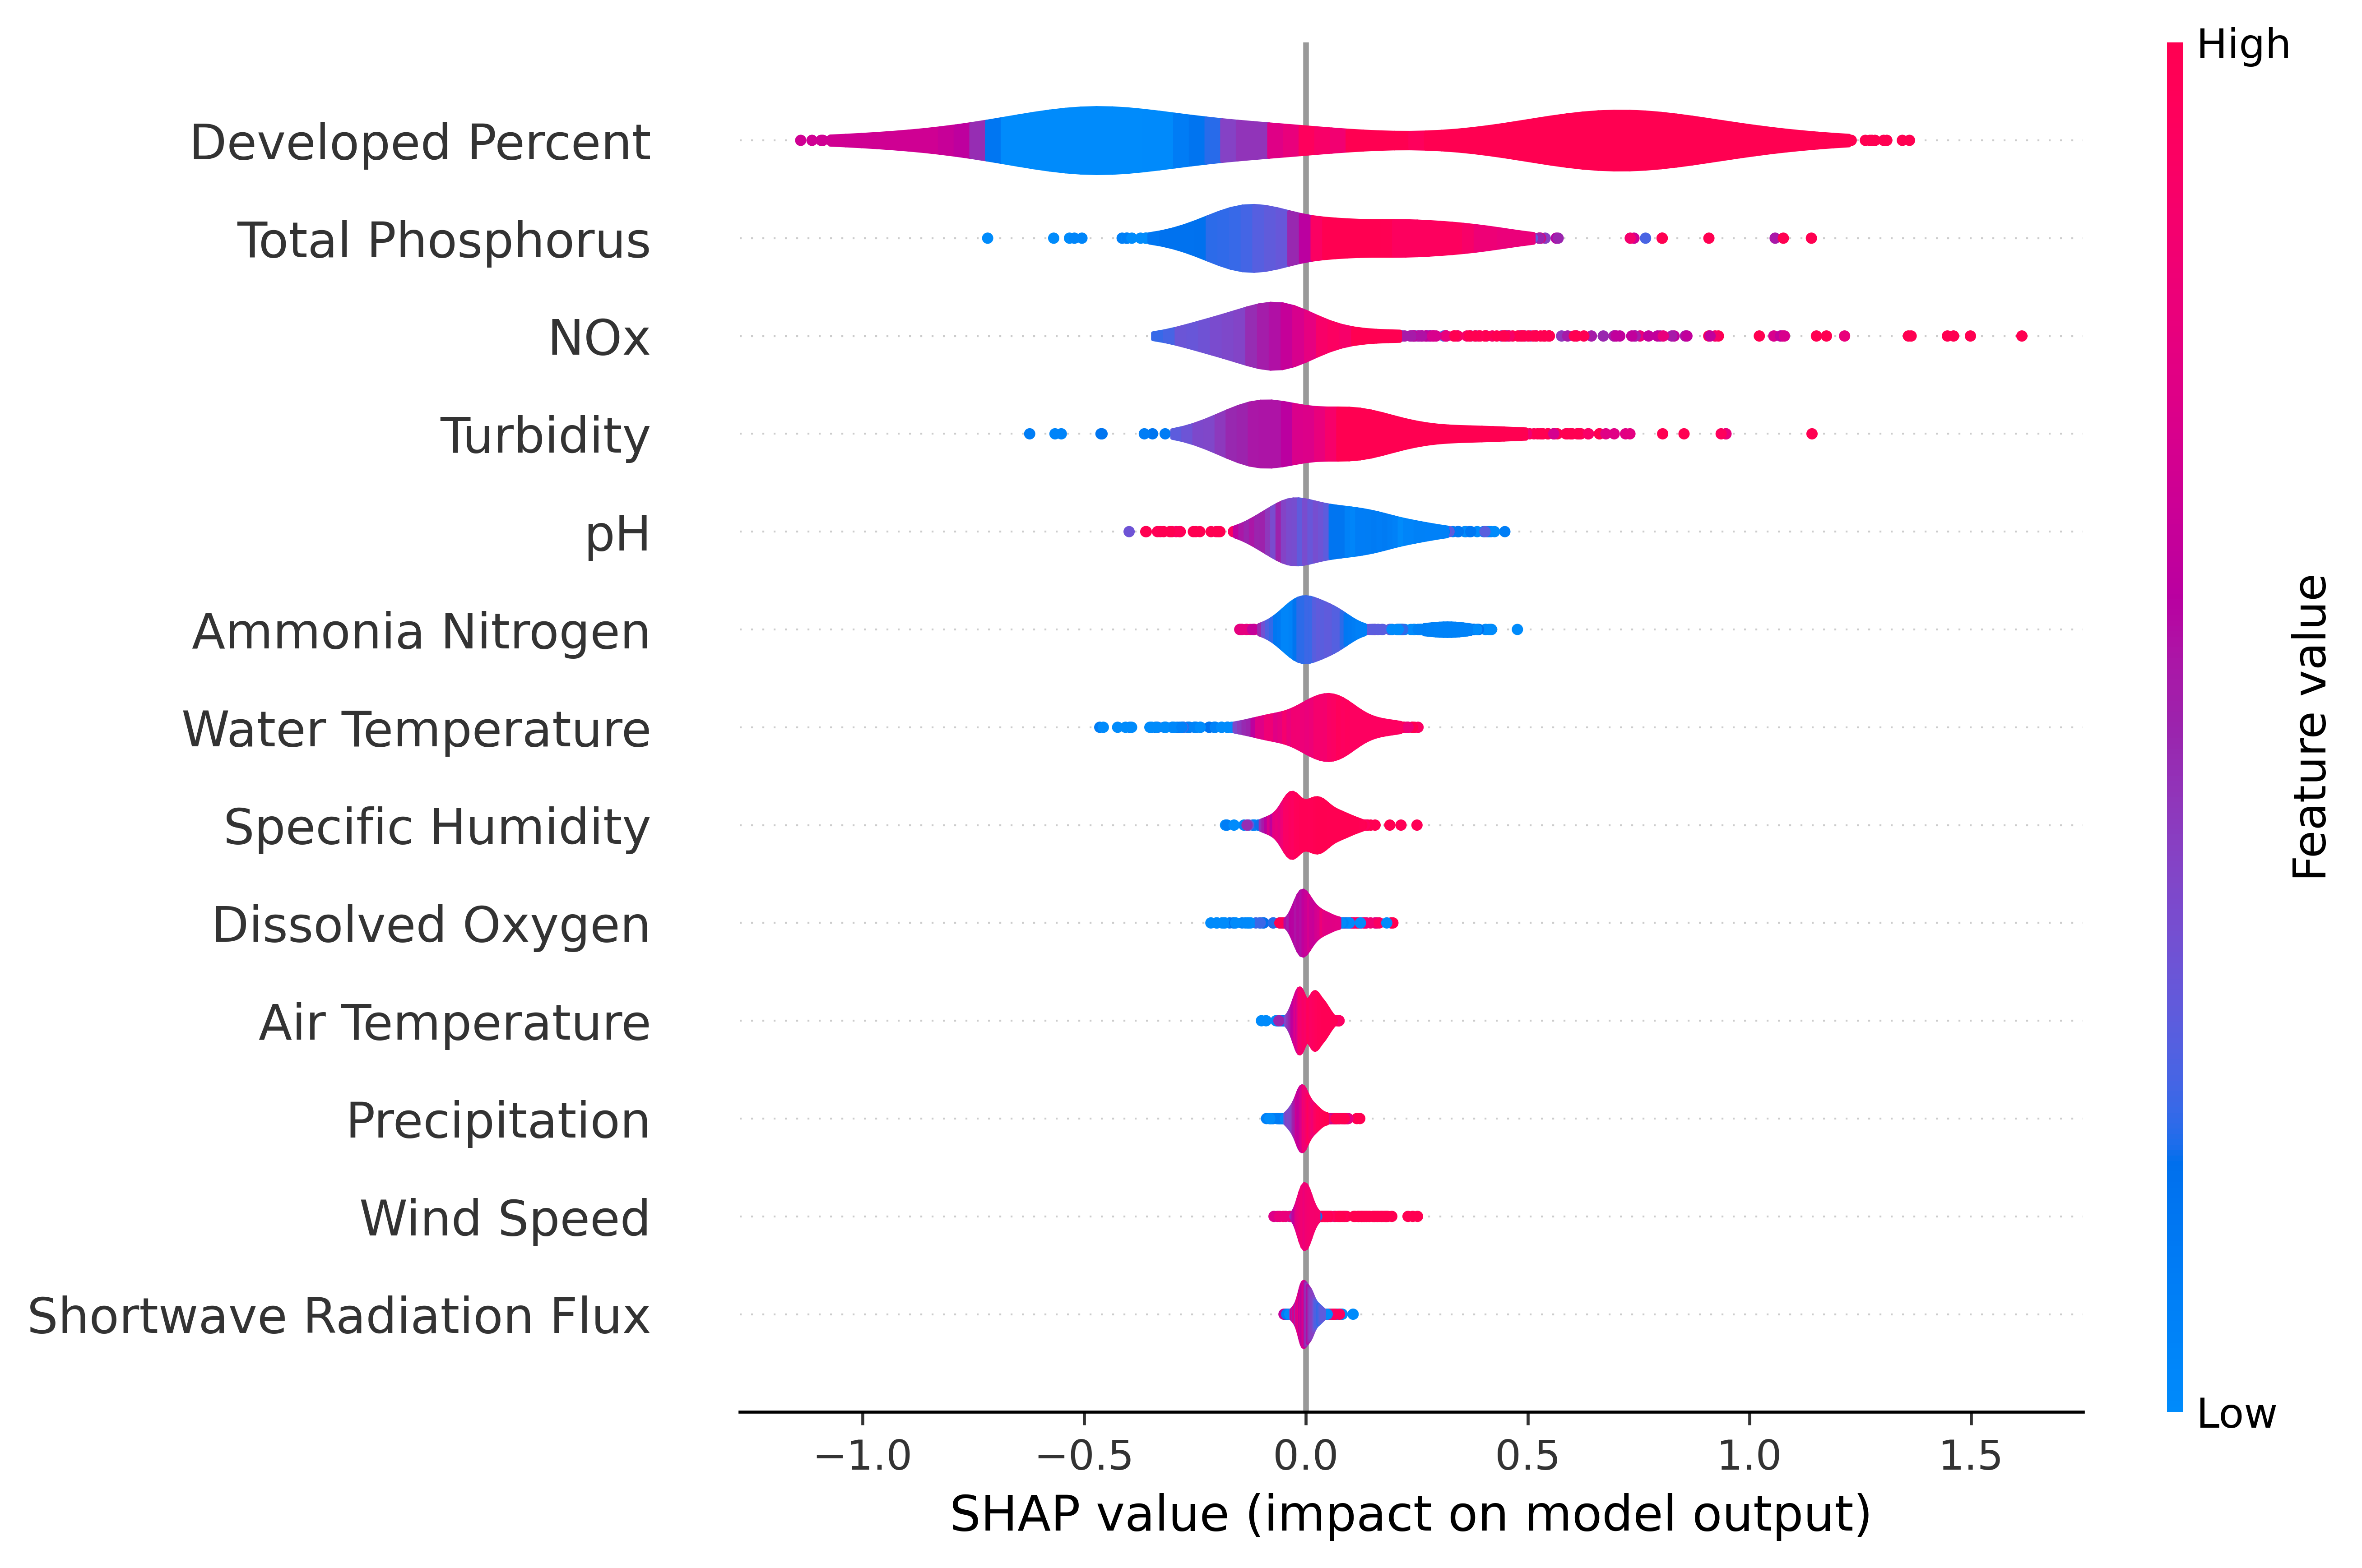

In [35]:
import shap
explainer = shap.TreeExplainer(ETR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [36]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
12,Developed Percent,0.566172
6,Total Phosphorus,0.195169
1,NOx,0.18248
5,Turbidity,0.171461
3,pH,0.10657
0,Ammonia Nitrogen,0.089279
4,Water Temperature,0.086049
8,Specific Humidity,0.046656
2,Dissolved Oxygen,0.032353
7,Air Temperature,0.02384


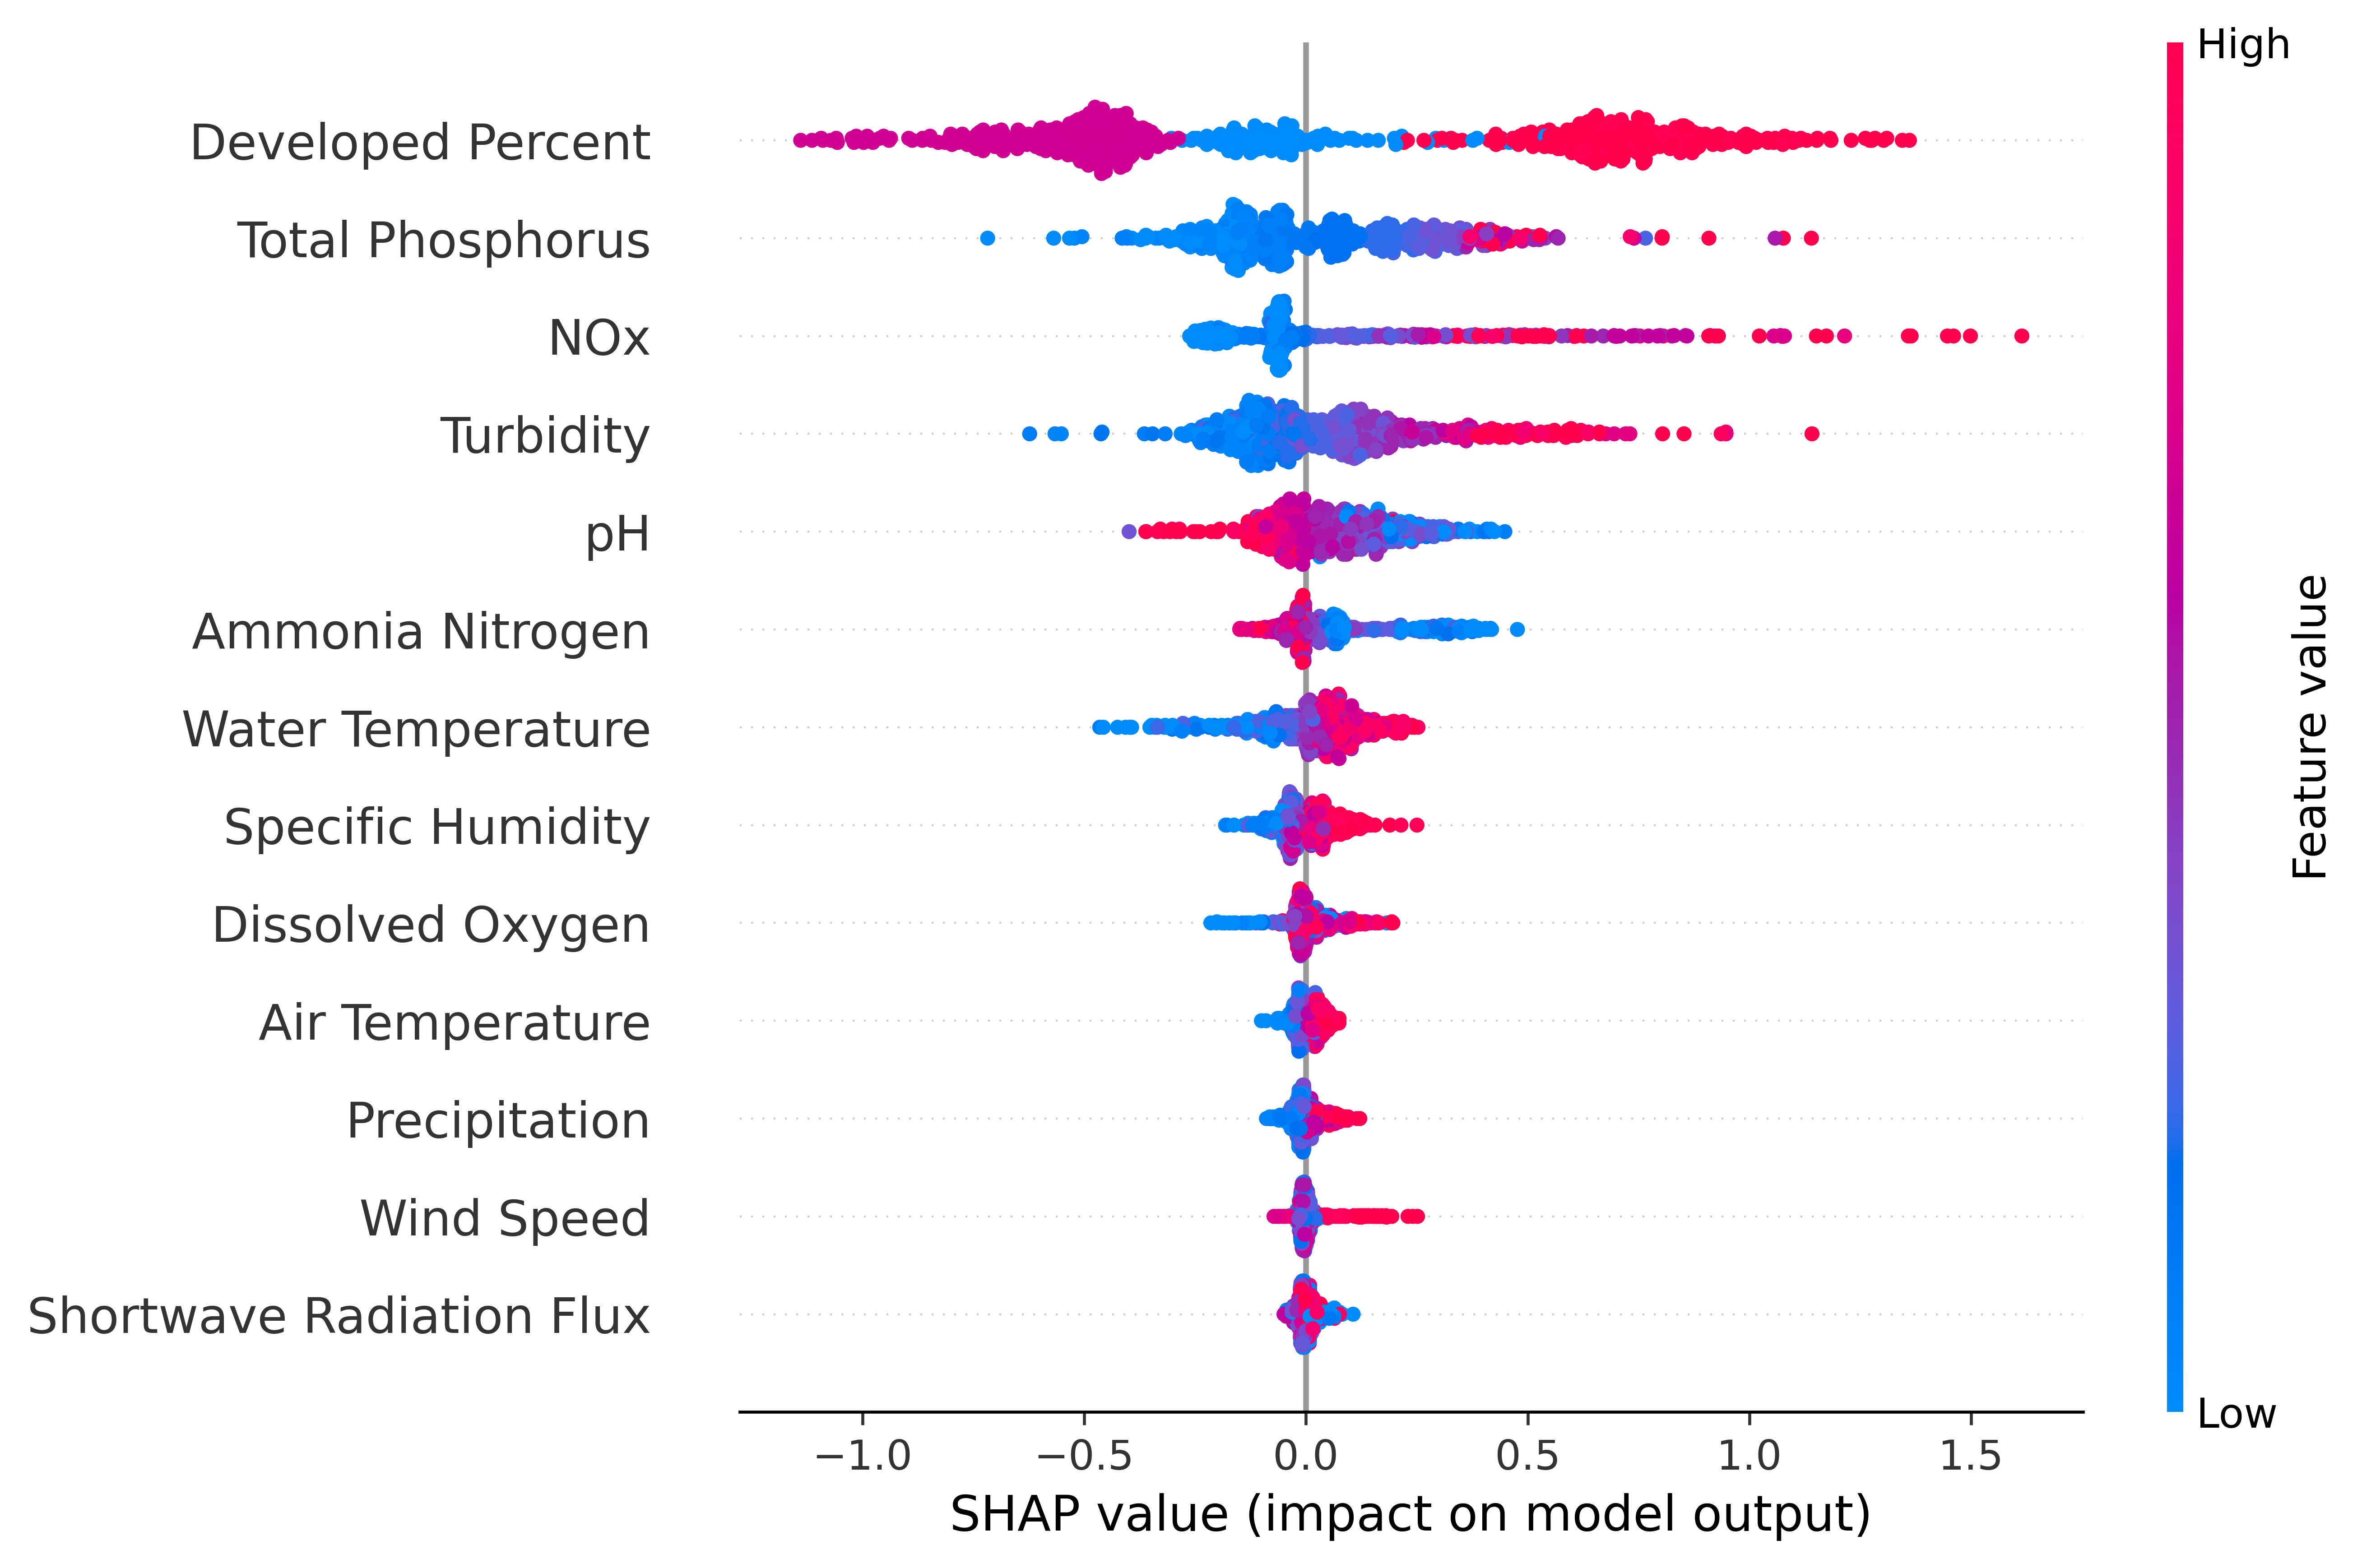

In [37]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [38]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [39]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_current,Predicted Chlorophyll-a
0,2.540000,1.287794
1,3.759632,2.858073
2,2.860000,1.604481
3,3.692863,3.168357
4,5.130000,2.075481
...,...,...
2731,1.400000,1.023784
2732,0.860000,0.909799
2733,0.460000,0.617415
2734,0.540000,0.597009


In [40]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [41]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_current,Predicted Chlorophyll-a
2736,3.080000,3.835153
2737,6.830000,2.344405
2738,4.349878,2.711595
2739,2.740000,2.656146
2740,2.210000,2.496916
...,...,...
3451,0.600000,0.888824
3452,0.480000,0.777834
3453,0.630000,0.883643
3454,0.930000,1.338970


In [42]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_current,Predicted Chlorophyll-a
0,2.540000,1.287794
1,3.759632,2.858073
2,2.860000,1.604481
3,3.692863,3.168357
4,5.130000,2.075481
...,...,...
3451,0.600000,0.888824
3452,0.480000,0.777834
3453,0.630000,0.883643
3454,0.930000,1.338970


In [43]:
All_Y.loc[0]

Chl_current                2.540000
Predicted Chlorophyll-a    1.287794
Name: 0, dtype: float64

In [44]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [45]:
import os
import joblib
joblib.dump(ETR, "./ETR_wolag.joblib")

['./ETR_wolag.joblib']

In [46]:
import os
import joblib
loaded_etr = joblib.load("./ETR_wolag.joblib")

In [47]:
# original
aaaa = loaded_etr.predict(x)

In [48]:
aaaa

array([1.28779435, 2.85807303, 1.60448114, ..., 0.88364341, 1.33896999,
       0.72151286])

In [49]:
len(aaaa)

3456